In [1]:
suppressMessages({
    suppressWarnings({
        library(OmnipathR)
        library(Seurat)
        library("org.Mm.eg.db", quietly = T)
        library(biomaRt, quietly = T)
        library(ggplot2)
        library(dplyr)
        library(reshape2)
        library(dplyr)
        library(broom)
    })
})

source('./utility_functions.r')

Allowing parallel execution with up to 30 working processes.


In [2]:
server = 'mando'
if (server == 'jabba'){
    data_path = '/data3/hratch/norcross_abc/'
}else if (server == 'mando'){
    data_path = '/data/hratch/norcross_abc/'
}

correlates of cell proportion: https://www.sciencedirect.com/science/article/pii/S0092867419307329
cell type specific correlation of pathway

may want to use metacells again

In [36]:
abc.integrated<-readRDS(paste0(data_path, 'processed/abc_annotated.RDS'))
md<-abc.integrated@meta.data
# human.genes<-sapply(VariableFeatures(abc.integrated), function(x) toupper(x))
#                     human.genes<-unlist(unname(human.genes))

In [37]:
inflammasome.go.terms<-c("GO:0061702", 'GO:1904784', 'GO:0140973', 'GO:0140970', 'GO:0140738', 'GO:0140632', 
                         'GO:0140633', 'GO:0140634', 'GO:1900227', 'GO:0044546', 'GO:0097169', 'GO:0160074', 
                         'GO:0160075', 'GO:0072559', 'GO:0072557', 'GO:0072558')
type1.ifns.go.terms<-c('GO:1990231', 'GO:0032606', 'GO:0019962', 'GO:0038197', 'GO:0034340', 'GO:0005132', 
                       'GO:0004905', 'GO:0032481', 'GO:0060337', 'GO:0071357', 'GO:0060340')


In [38]:
inflammasome <- unique(AnnotationDbi::select(org.Mm.eg.db, inflammasome.go.terms, columns = c('SYMBOL'), keytype = "GOALL")$SYMBOL)
inflammasome

'select()' returned 1:many mapping between keys and columns



[1] "Casp1"         "Casp4"         "Casp12"        "Ddx3x"        
 [5] "Naip1"         "Naip2"         "Naip5"         "Naip6"        
 [9] "Naip7"         "Mefv"          "Pycard"        "Gsdmd"        
[13] "Nlrp6"         "Nlrp1a"        "Nlrp3"         "Dhx33"        
[17] "Nlrp9a"        "Nlrp9b"        "Nlrc4"         "Nlrp9c"       
[21] "Aim2"          "Nlrp1b"        NA              "Cd36"         
[25] "Myd88"         "Eif2ak2"       "Trim30a"       "Tlr4"         
[29] "Tlr6"          "Nek7"          "Sirt2"         "1810058I24Rik"
[33] "Atat1"         "Usp50"         "Cptp"          "Trem2"        
[37] "Gbp5"          "Plcg2"         "Nlrc3"

In [39]:
type1.ifns <- unique(AnnotationDbi::select(org.Mm.eg.db, type1.ifns.go.terms, columns = c('SYMBOL'), keytype = "GOALL")$SYMBOL)
type1.ifns

'select()' returned 1:many mapping between keys and columns



[1] "Sting1"   "Ap3b1"    "Ap3d1"    "Atg5"     "Cd14"     "Chuk"    
  [7] "Crebbp"   "Ddx3x"    "Dhx9"     "Flot1"    "Flt3"     "Gapdh"   
 [13] "Hmgb1"    "Hspd1"    "Hsp90aa1" "Irf8"     "Ifnar1"   "Irak1"   
 [19] "Irf1"     "Acod1"    "Irf9"     "Mmp12"    "Gbp4"     "Myd88"   
 [25] "Nmbr"     "Pola1"    "Ppm1b"    "Ptpn11"   "Ptpn22"   "Sirpa"   
 [31] "Ptprs"    "Rel"      "Relb"     "Stat1"    "Syk"      "Tlr4"    
 [37] "Traf3"    "Traip"    "Trex1"    "Ufd1"     "Yy1"      "Banf1"   
 [43] "Oas1g"    "Tlr2"     "G3bp1"    "Irf5"     "Tomm70a"  "Irf7"    
 [49] "Irf3"     "Pqbp1"    "Tbk1"     "Zbtb20"   "Nmi"      "Pycard"  
 [55] "Riok3"    "Polr3d"   "Polr3g"   "Atg12"    "Rnf125"   "Zcchc3"  
 [61] "Nmb"      "Trim15"   "Cactin"   "Polr3f"   "Polr3b"   "Ifih1"   
 [67] "Rnf135"   "Dhx36"    "Ppme1"    "Traf3ip1" "Polr3c"   "Garin5a" 
 [73] "Rab2b"    "Zc3hav1"  "Dhx58"    "Tlr9"     "Hmgb2"    "Oas1d"   
 [79] "Ticam1"   "Rnf216"   "D1Pas1"   "Oas1c"    "Tirap"    "Tlr3"    
 [85] "Tlr7"     "Tlr8"     "Havcr2"   "Rnf26"    "Trim38"   "Cgas"    
 [91] "Dhx33"    "Nploc4"   "Polr3a"   "Ilrun"    "Mavs"     "Rigi"    
 [97] "Oas1e"    "Plcg2"    "Setd2"    "Peli3"    "Gpatch3"  "Oas1f"   
[103] "Atg9a"    "Oas3"     "Oas2"     "Oas1h"    "Oas1a"    "Nlrc3"   
[109] "Nlrx1"    "Trim56"   "Lrrc55os" "Isg15"    "Ifnar2"   NA        
[115] "Cdc37"    "Ch25h"    "Fadd"     "Ifna1"    "Ifnb1"    "Cnot7"   
[121] "Ptpn2"    "Smpd1"    "Sp100"    "Stat2"    "Wnt5a"    "Ifi27"   
[127] "Ube2k"    "Usp27x"   "Samhd1"   "Mettl3"   "Adar"     "Ikbke"   
[133] "Usp29"    "Zbp1"     "Ifitm3"   "Lsm14a"   "Mul1"     "Ifitm1"  
[139] "Ifitm7"   "Dcst1"    "Ifitm2"   "Trim6"    "Shmt2"    "Rnf185"  
[145] "Trim41"   "Ifitm6"   "Ythdf2"   "Ttll12"   "Ythdf3"   "Shfl"    
[151] "Nlrc5"    "Ifna11"   "Ifna2"    "Ifna4"    "Ifna5"    "Ifna6"   
[157] "Ifna7"    "Ifna9"    "Ifnab"    "Ifna13"   "Ifna16"   "Ifne"    
[163] "Ifna15"   "Ifna12"   "Ifnz"     "Ifnk"     "Ifna14"   "Gm13271" 
[169] "Gm13283"  "Gm13272"  "Gm13276"  "Gm13277"  "Gm13275"

Additionally, "oxidative stress" genes and "mitochondrial dysfunction" genes were downloaded from GeneCards, by searching each of these terms respectively

In [40]:
# # https://www.r-bloggers.com/2016/10/converting-mouse-to-human-gene-names-with-biomart-package/
# convertHumanGeneList <- function(x){

#     human = useMart("ensembl", dataset = "hsapiens_gene_ensembl")
#     mouse = useMart("ensembl", dataset = "mmusculus_gene_ensembl")
#     genesV2 = biomaRt::getLDS(attributes = c("hgnc_symbol"), filters = "hgnc_symbol", values = x , 
#                               mart = human, attributesL = c("mgi_symbol"), martL = mouse, uniqueRows=T)

#     humanx <- unique(genesV2[, 2])

#     return(humanx)
# }

In [41]:
ros = list('mitochondrial.dysfunction' = read.csv(paste0(data_path, 'raw/', 'genecards_mitochondrial_dysfunction.csv' )), 
          'oxidative.stress' = read.csv(paste0(data_path, 'raw/', 'genecards_oxidative_stress.csv' )))


for (term in names(ros)){
    # quick conversion to mouse
    ros[[term]][['Gene.Symbol']]<-unname(sapply(ros[[term]][['Gene.Symbol']], 
                                            function(x) paste0(substr(x, 1, 1), substr(tolower(x), 2, nchar(x))))) 
    ros[[term]][['Pathway.Name']]<-term
}
ros<-do.call("rbind", ros)

Prior to thresholding genes for relevance score, the # of genes in each pathway is:

In [42]:
table(ros$Pathway.Name)


mitochondrial.dysfunction          oxidative.stress 
                    10639                     13169 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


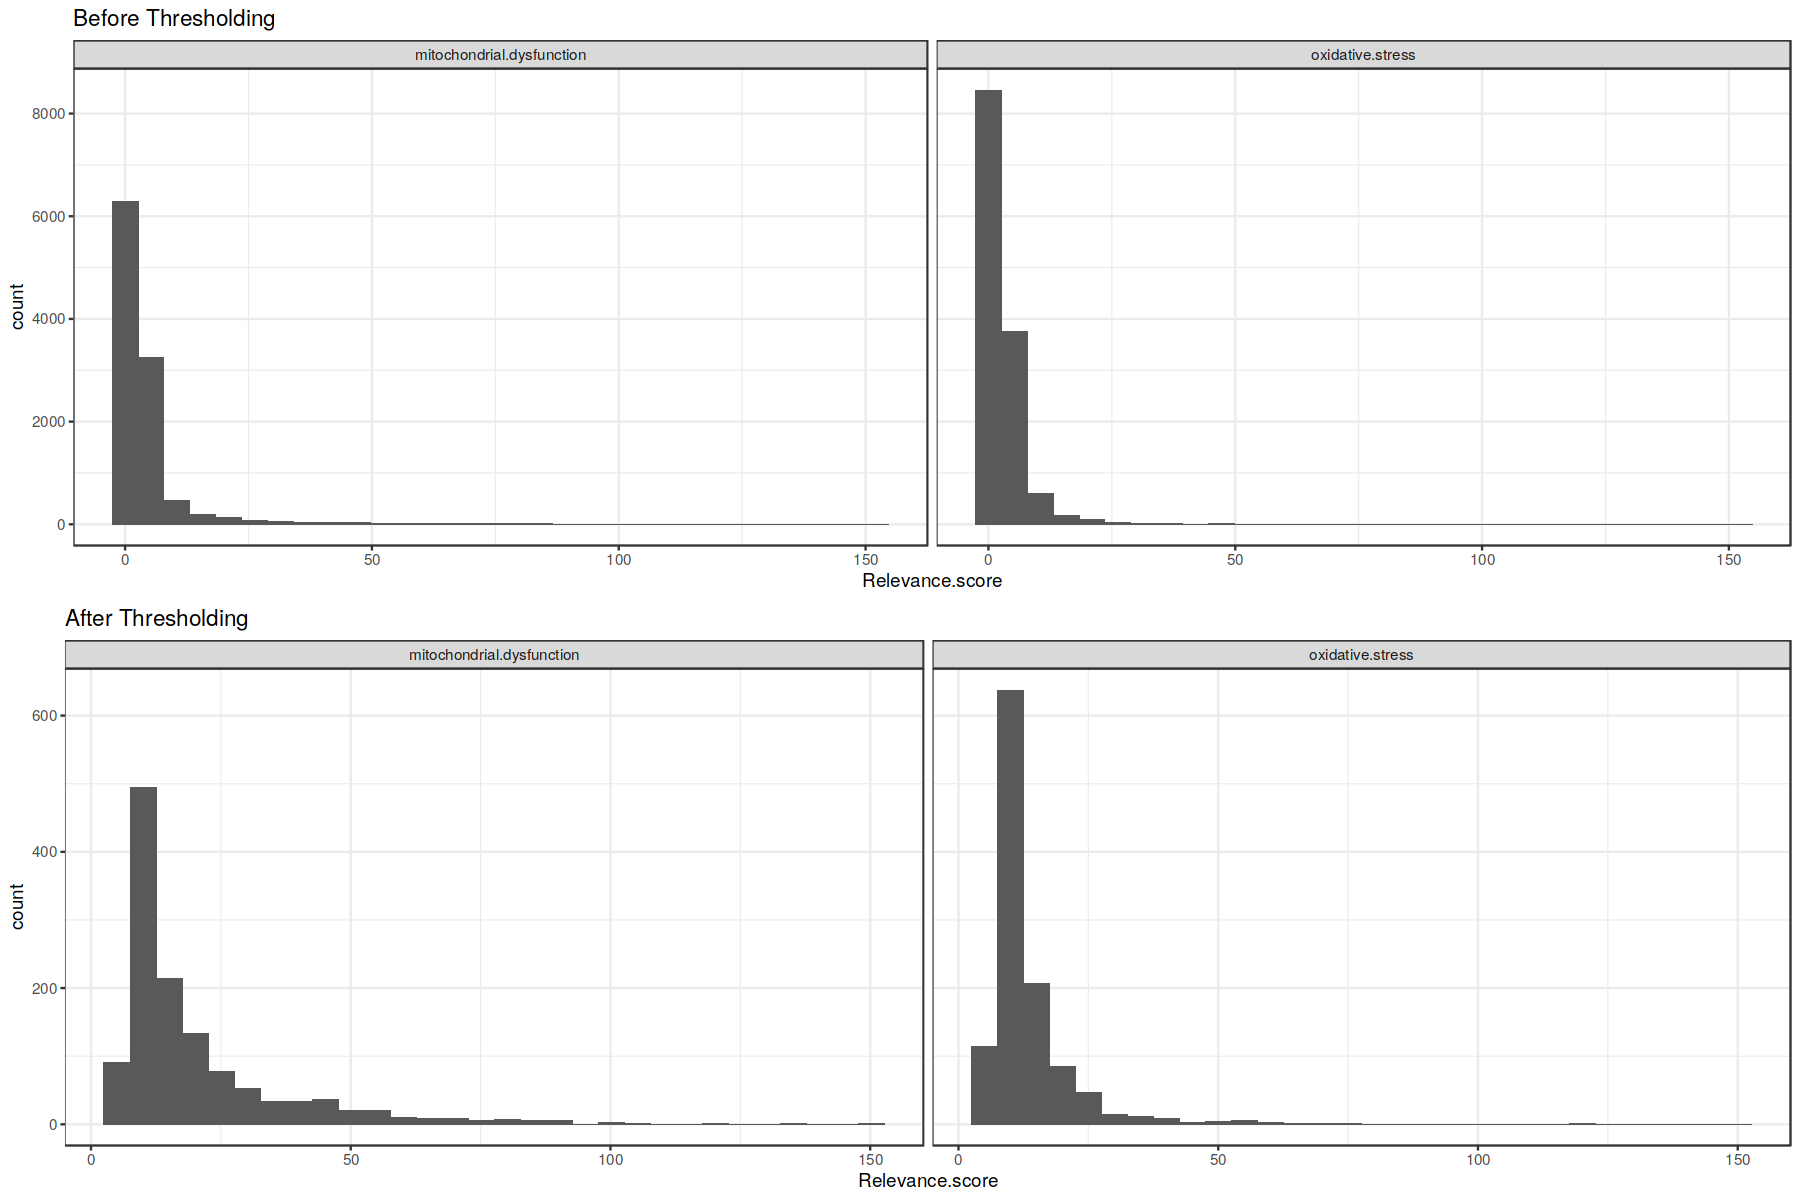

In [43]:
gA<-ggplot(data = ros, aes(x = Relevance.score)) + geom_histogram() + facet_wrap(~Pathway.Name) + 
ggtitle('Before Thresholding') + theme_bw()

score.thresh<-7
ros<-ros[ros$Relevance.score > score.thresh,]

gB<-ggplot(data = ros, aes(x = Relevance.score)) + geom_histogram() + facet_wrap(~Pathway.Name) + 
ggtitle('After Thresholding') + theme_bw()

g<-cowplot::plot_grid(gA, gB, ncol = 1)
g

After thresholding genes for relevance score, the # of genes in each pathway is:

In [44]:
table(ros$Pathway.Name)


mitochondrial.dysfunction          oxidative.stress 
                     1263                      1142 

Filter for those genes present in the batch-corrected data:

In [45]:
type1.ifns<-intersect(type1.ifns, rownames(abc.integrated))
inflammasome<-intersect(inflammasome, rownames(abc.integrated))
mdf<-intersect(ros[ros$Pathway.Name == 'mitochondrial.dysfunction', 'Gene.Symbol'], rownames(abc.integrated))
os<-intersect(ros[ros$Pathway.Name == 'oxidative.stress', 'Gene.Symbol'], rownames(abc.integrated))

gene.terms<-list('type1.ifns' = type1.ifns, 
                'inflammasome' = inflammasome, 
                'mitochondrial.dysfunction' = mdf, 
                'oxidative.stress' = os)

In [70]:
assay(abc.integrated)

ERROR: Error in assay(abc.integrated): could not find function "assay"


In [46]:
inflammasome

[1] "Casp4"   "Mefv"    "Nlrp3"   "Cd36"    "Eif2ak2" "Trim30a" "Gbp5"

In [47]:
type1.ifns

[1] "Cd14"     "Flt3"     "Gapdh"    "Hmgb1"    "Hspd1"    "Hsp90aa1"
 [7] "Irf8"     "Irf1"     "Mmp12"    "Gbp4"     "Pola1"    "Sirpa"   
[13] "Ptprs"    "Rel"      "Relb"     "Syk"      "Irf5"     "Irf7"    
[19] "Zbtb20"   "Ifih1"    "Hmgb2"    "Tlr3"     "Tlr7"     "Havcr2"  
[25] "Oas3"     "Isg15"    "Samhd1"   "Zbp1"     "Ifitm3"   "Ifitm1"  
[31] "Ifitm2"   "Ifitm6"

In [48]:
print(paste0('After filtering for those present in HVGs, there are ', length(mdf), 
             ' genes associated with mitochondrial dysfunction'))
print(paste0('After filtering for those present in HVGs, there are ', length(os), 
             ' genes associated with oxidative stress'))

[1] "After filtering for those present in HVGs, there are 107 genes associated with mitochondrial dysfunction"
[1] "After filtering for those present in HVGs, there are 196 genes associated with oxidative stress"


In [49]:
mdf

[1] "Chchd10"  "Cycs"     "Dna2"     "Cox6a2"   "Csf2ra"   "Iscu"    
  [7] "Ppargc1a" "Lmna"     "Pnpla8"   "Hspd1"    "Bcl2"     "Lrrk2"   
 [13] "Acta2"    "Pparg"    "Aldh2"    "Casp3"    "Tnf"      "Ttn"     
 [19] "Il6"      "Bcl2l1"   "Apoe"     "App"      "Ace"      "Htra2"   
 [25] "Acadl"    "Fas"      "Il1b"     "Tubb6"    "Csf2rb"   "Ece1"    
 [31] "Calm1"    "Lmnb1"    "Slc25a29" "Igf1"     "Tnnt2"    "Ddhd1"   
 [37] "Malat1"   "Hsp90aa1" "Gpd2"     "Gsr"      "Nlrp3"    "Lactb"   
 [43] "Hmox1"    "Gatm"     "Nampt"    "Vegfa"    "Arg2"     "Ass1"    
 [49] "Lepr"     "Ifng"     "Cybb"     "Cd36"     "Lpl"      "Kif1a"   
 [55] "Dnmt1"    "Cdkn2a"   "Lbr"      "Jak2"     "Grn"      "Ldlr"    
 [61] "Hspa8"    "Bcl2l11"  "Ccnf"     "Neat1"    "Fgfr1"    "Ldha"    
 [67] "Idh1"     "Psap"     "Prdx5"    "Prkcd"    "Prnp"     "Clu"     
 [73] "Hfe"      "Anxa5"    "Tfrc"     "Hk2"      "Il18"     "Pdcd1"   
 [79] "Cd40lg"   "Thbd"     "Xist"     "Cdh1"     "Slc6a4"   "Gsn"     
 [85] "Dnajc15"  "Gapdh"    "Brca2"    "Foxp3"    "Brca1"    "Tg"      
 [91] "Mmp9"     "Lyst"     "Ctla4"    "C3"       "Npc2"     "Ccnd1"   
 [97] "Sigmar1"  "Birc5"    "Kit"      "Hmgb1"    "Myc"      "Cdkn1a"  
[103] "Cd4"      "Icam1"    "Rpgrip1"  "Gpx1"     "Got1"

In [50]:
os

[1] "Hmox1"    "Tnf"      "Gsr"      "Osgin1"   "Il6"      "Cycs"    
  [7] "Casp3"    "Il1b"     "Gpx1"     "Hspa5"    "Calm1"    "App"     
 [13] "Jun"      "Ptgs2"    "Gstm1"    "Slc6a4"   "Xbp1"     "Bcl2"    
 [19] "Hspb1"    "Hsp90aa1" "Cybb"     "Ifng"     "Prdx5"    "Gapdh"   
 [25] "Vegfa"    "Hspa1a"   "Cp"       "Ace"      "Sod3"     "Gstt1"   
 [31] "Fos"      "Apoe"     "Lmna"     "Prkcd"    "Ppargc1a" "Pparg"   
 [37] "Hspa8"    "Serp1"    "Icam1"    "Gpx3"     "Trpm2"    "Cdkn1a"  
 [43] "Aldh2"    "Clu"      "Eif2ak2"  "Acadl"    "Cd36"     "Vcam1"   
 [49] "Hmgb1"    "Pla2g7"   "Brca1"    "Gclc"     "Glrx"     "Msrb1"   
 [55] "Cdkn2a"   "Prdx4"    "Ptgs1"    "Ncf2"     "Fas"      "Cygb"    
 [61] "Selp"     "Malat1"   "Anxa5"    "Ggt1"     "Herpud1"  "Igf1"    
 [67] "Bcl2l1"   "Atf3"     "Pcna"     "Nlrp3"    "Kdr"      "Ephx1"   
 [73] "Ttn"      "Nostrin"  "Hspd1"    "Myc"      "Alox5"    "Jak2"    
 [79] "Calr"     "Hp"       "Hsp90b1"  "Mgst1"    "Mmp9"     "Ncf1"    
 [85] "Lrrk2"    "Egf"      "Brca2"    "Cebpb"    "Prkca"    "Thbd"    
 [91] "Il18"     "Arg1"     "Arg2"     "Dusp1"    "Ass1"     "Bcl2l11" 
 [97] "Atr"      "Htra2"    "Nfkbia"   "Slc7a11"  "Hspa1b"   "Egr1"    
[103] "Hfe"      "Fn1"      "Cdkn3"    "Adm"      "Iscu"     "Prnp"    
[109] "Ldha"     "Idh1"     "Ctsb"     "Gucy1a1"  "Ccnd1"    "Hsp90ab1"
[115] "Il1rn"    "Kcnq1ot1" "E2f1"     "Plat"     "Rad51"    "Atp1a3"  
[121] "S100a8"   "Xist"     "Zfp36"    "Ctsd"     "Npm1"     "Syk"     
[127] "Pik3r1"   "Ndrg1"    "Mif"      "Il4"      "Tnfrsf1b" "Actb"    
[133] "Pdlim4"   "Casp4"    "Igf1r"    "Cryaa"    "Ahr"      "Dnmt1"   
[139] "Abca1"    "Nampt"    "Ccl3"     "Tg"       "Gsto1"    "Serpinf1"
[145] "Flt1"     "Tfrc"     "Il1r1"    "Nr4a2"    "Odc1"     "Itpr1"   
[151] "Muc1"     "Manf"     "Vim"      "Itgb1"    "Cd40"     "Chchd10" 
[157] "Lbr"      "Cd40lg"   "Sigmar1"  "Msr1"     "Slc1a3"   "Birc5"   
[163] "Cacna1s"  "Cdk6"     "Itgam"    "Hbegf"    "Lpl"      "Fth1"    
[169] "Cd44"     "Ccl5"     "Maf"      "Runx2"    "Csf1"     "Kcnj2"   
[175] "Cdk1"     "Cdh5"     "Tgm2"     "Pon3"     "Selenop"  "Hgf"     
[181] "Taldo1"   "Ezh2"     "Tgfb2"    "Anxa2"    "Fosb"     "Tnfsf11" 
[187] "Klf4"     "Synpo2"   "Irf1"     "Chka"     "Ccna2"    "Il12b"   
[193] "Tuba1b"   "Slpi"     "Rora"     "Lgals3"

In [51]:
# abc.integrated.meta<-get.metacells(abc.integrated, #min_cells = 25, k = 25, 
#                                group.by = c("Cell.Type.Level1", 'orig.ident'), ident.group = "Cell.Type.Level1")

Let's get the batch-corrected, scaled expression matrix:

In [52]:
gene.terms<-list('type1.ifns' = type1.ifns, 
                'inflammasome' = inflammasome, 
                'mitochondrial.dysfunction' = mdf, 
                'oxidative.stress' = os)

In [53]:
expr<-GetAssayData(abc.integrated, assay = 'RNA', slot = 'data')


In [54]:
expr.genes<-lapply(gene.terms, function(genes) expr[genes, ])
names(expr.genes)<-names(gene.terms)

Take the cell-wise median expression across relevant genes:

In [55]:
med.genes<-lapply(expr.genes, function(expr.gene) apply(expr.gene, 2, median))
names(med.genes)<-names(expr.genes)

md<-abc.integrated@meta.data         
for (pathway.name in names(med.genes)){
    md[[paste0('Med.', pathway.name)]]<-unlist(unname(med.genes[[pathway.name]]))
}
md<-md[md$Cell.Type.Level1 != 'Unknown', ]
md<-md[c('orig.ident', 'Cell.Type.Level1', paste0('Med.', names(med.genes)))]

For each cell type, calculate teh ANOVA p-value across conditions:

In [56]:
anova.genes<-list()
for (pathway.name in names(med.genes)){
    anova.genes[[pathway.name]]<-md %>%
                            select(c('orig.ident', 'Cell.Type.Level1', paste0('Med.', pathway.name))) %>% 
                            group_by(Cell.Type.Level1) %>%
                            do(Model = aov(as.formula(paste0('Med.', pathway.name, ' ~ orig.ident')), data=.)) %>%
                            mutate(ANOVA.pval = summary(Model)[[1]][["Pr(>F)"]][1]) %>% 
                            select(-one_of(c('Model'))) %>%
                            mutate(ANOVA.fdr = p.adjust(ANOVA.pval, method = 'BH'))
}

For each cell type, aggregate the pathway expression (median scaled across all genes for a cell) by the median value. 
Then, take the correlation b/w the aggregated value and the condition:

In [57]:
cors<-md %>% 
group_by(Cell.Type.Level1, orig.ident)%>% 
summarise(Med.inflammasome=median(Med.inflammasome), 
          Med.type1.ifns=median(Med.type1.ifns), 
         Med.mitochondrial.dysfunction=median(Med.mitochondrial.dysfunction), 
         Med.oxidative.stress=median(Med.oxidative.stress))

mapper<-1:length(levels(cors$orig.ident))
names(mapper)<-levels(cors$orig.ident)
cors['Condition']<-unname(unlist(mapper[as.character(cors$orig.ident)]))

cors.genes<-list()
for (pathway.name in names(med.genes)){
    cors.genes[[pathway.name]]<-cors %>%
            group_by(Cell.Type.Level1)%>% 
            select(paste0('Med.', pathway.name), 'Condition') %>%
            rename('Med' = paste0('Med.', pathway.name)) %>%
            mutate(Correlation = cor(Med, Condition, method = 'spearman', use = 'pairwise.complete.obs')) %>%
            select(c('Cell.Type.Level1','Correlation')) %>% 
            distinct(.keep_all = TRUE)
}

`summarise()` has grouped output by 'Cell.Type.Level1'. You can override using
the `.groups` argument.
Adding missing grouping variables: `Cell.Type.Level1`
Warning message:
“There were 9 warnings in `mutate()`.
The first warning was:
ℹ In argument: `Correlation = cor(Med, Condition, method = "spearman", use =
  "pairwise.complete.obs")`.
ℹ In group 1: `Cell.Type.Level1 = Pre-B cells`.
Caused by warning in `stats::cor()`:
! the standard deviation is zero
ℹ Run `dplyr::last_dplyr_warnings()` to see the 8 remaining warnings.”
Adding missing grouping variables: `Cell.Type.Level1`
Warning message:
“There were 11 warnings in `mutate()`.
The first warning was:
ℹ In argument: `Correlation = cor(Med, Condition, method = "spearman", use =
  "pairwise.complete.obs")`.
ℹ In group 1: `Cell.Type.Level1 = Pre-B cells`.
Caused by warning in `stats::cor()`:
! the standard deviation is zero
ℹ Run `dplyr::last_dplyr_warnings()` to see the 10 remaining warnings.”
Adding missing grouping variables: `Cell.

Get the cell type composition (normalized per sample) of Level 1, from [Notebook 02]('../02_Compositional_Analysis.ipynb')

In [58]:
context.freq<-read.csv(paste0(data_path, 'processed/level1.composition.csv'))
context.freq<-context.freq %>% 
    select(-one_of(c('Unknown'))) %>% 
    rename(orig.ident = names(.)[1])
context.freq<-melt(context.freq, id.vars = c('orig.ident'), 
                   variable.name = 'Cell.Type.Level1', value.name = 'Frequency') %>%
            select(2,1, everything())

Calculate the correlation b/w the frequency of a cell type and the aggregated median expression of the cell type:

In [59]:
cors<-cors[cors$Cell.Type.Level1 != 'Unknown', ]
ct.mapper<-levels(cors$Cell.Type.Level1)[levels(cors$Cell.Type.Level1) != 'Unknown']
names(ct.mapper)<-levels(context.freq$Cell.Type.Level1)
context.freq[['Cell.Type.Level1']]<-factor(ct.mapper[context.freq$Cell.Type.Level1], 
          levels = levels(cors$Cell.Type.Level1)[levels(cors$Cell.Type.Level1) != 'Unknown'])

context.freq[['orig.ident']]<-factor(context.freq$orig.ident, 
                                    levels = levels(cors$orig.ident))
cors.freq<-dplyr::inner_join(context.freq, cors, by = c('Cell.Type.Level1', 'orig.ident'))

cors.freq.genes<-list()

for (pathway.name in names(med.genes)){
        cfg<-cors.freq %>%
                    group_by(Cell.Type.Level1)%>% 
                    select(paste0('Med.', pathway.name), 'Frequency', 'Cell.Type.Level1') %>%
                    rename('Med' = paste0('Med.', pathway.name)) %>%
                    mutate(Correlation = cor(Med, Frequency, method = 'spearman', use = 'pairwise.complete.obs')) %>%
                    select(c('Cell.Type.Level1','Correlation')) %>%
                    distinct(.keep_all = TRUE)
    cfg[['orig.ident']]<-NA
    cors.freq.genes[[pathway.name]]<-cfg
}


Warning message:
“There were 9 warnings in `mutate()`.
The first warning was:
ℹ In argument: `Correlation = cor(Med, Frequency, method = "spearman", use =
  "pairwise.complete.obs")`.
ℹ In group 1: `Cell.Type.Level1 = Pre-B cells`.
Caused by warning in `stats::cor()`:
! the standard deviation is zero
ℹ Run `dplyr::last_dplyr_warnings()` to see the 8 remaining warnings.”
Warning message:
“There were 11 warnings in `mutate()`.
The first warning was:
ℹ In argument: `Correlation = cor(Med, Frequency, method = "spearman", use =
  "pairwise.complete.obs")`.
ℹ In group 1: `Cell.Type.Level1 = Pre-B cells`.
Caused by warning in `stats::cor()`:
! the standard deviation is zero
ℹ Run `dplyr::last_dplyr_warnings()` to see the 10 remaining warnings.”
Warning message:
“There were 12 warnings in `mutate()`.
The first warning was:
ℹ In argument: `Correlation = cor(Med, Frequency, method = "spearman", use =
  "pairwise.complete.obs")`.
ℹ In group 1: `Cell.Type.Level1 = Pre-B cells`.
Caused by warning i

Are there any patterns for cell types across contexts with these pathways?

Violin plots look at median pathway expression across conditions. Pearson r b/w the context (rank ordered 1-5) and the median pathway scaled expression value further aggregated into cell types by median across all cells in that cell type

Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”


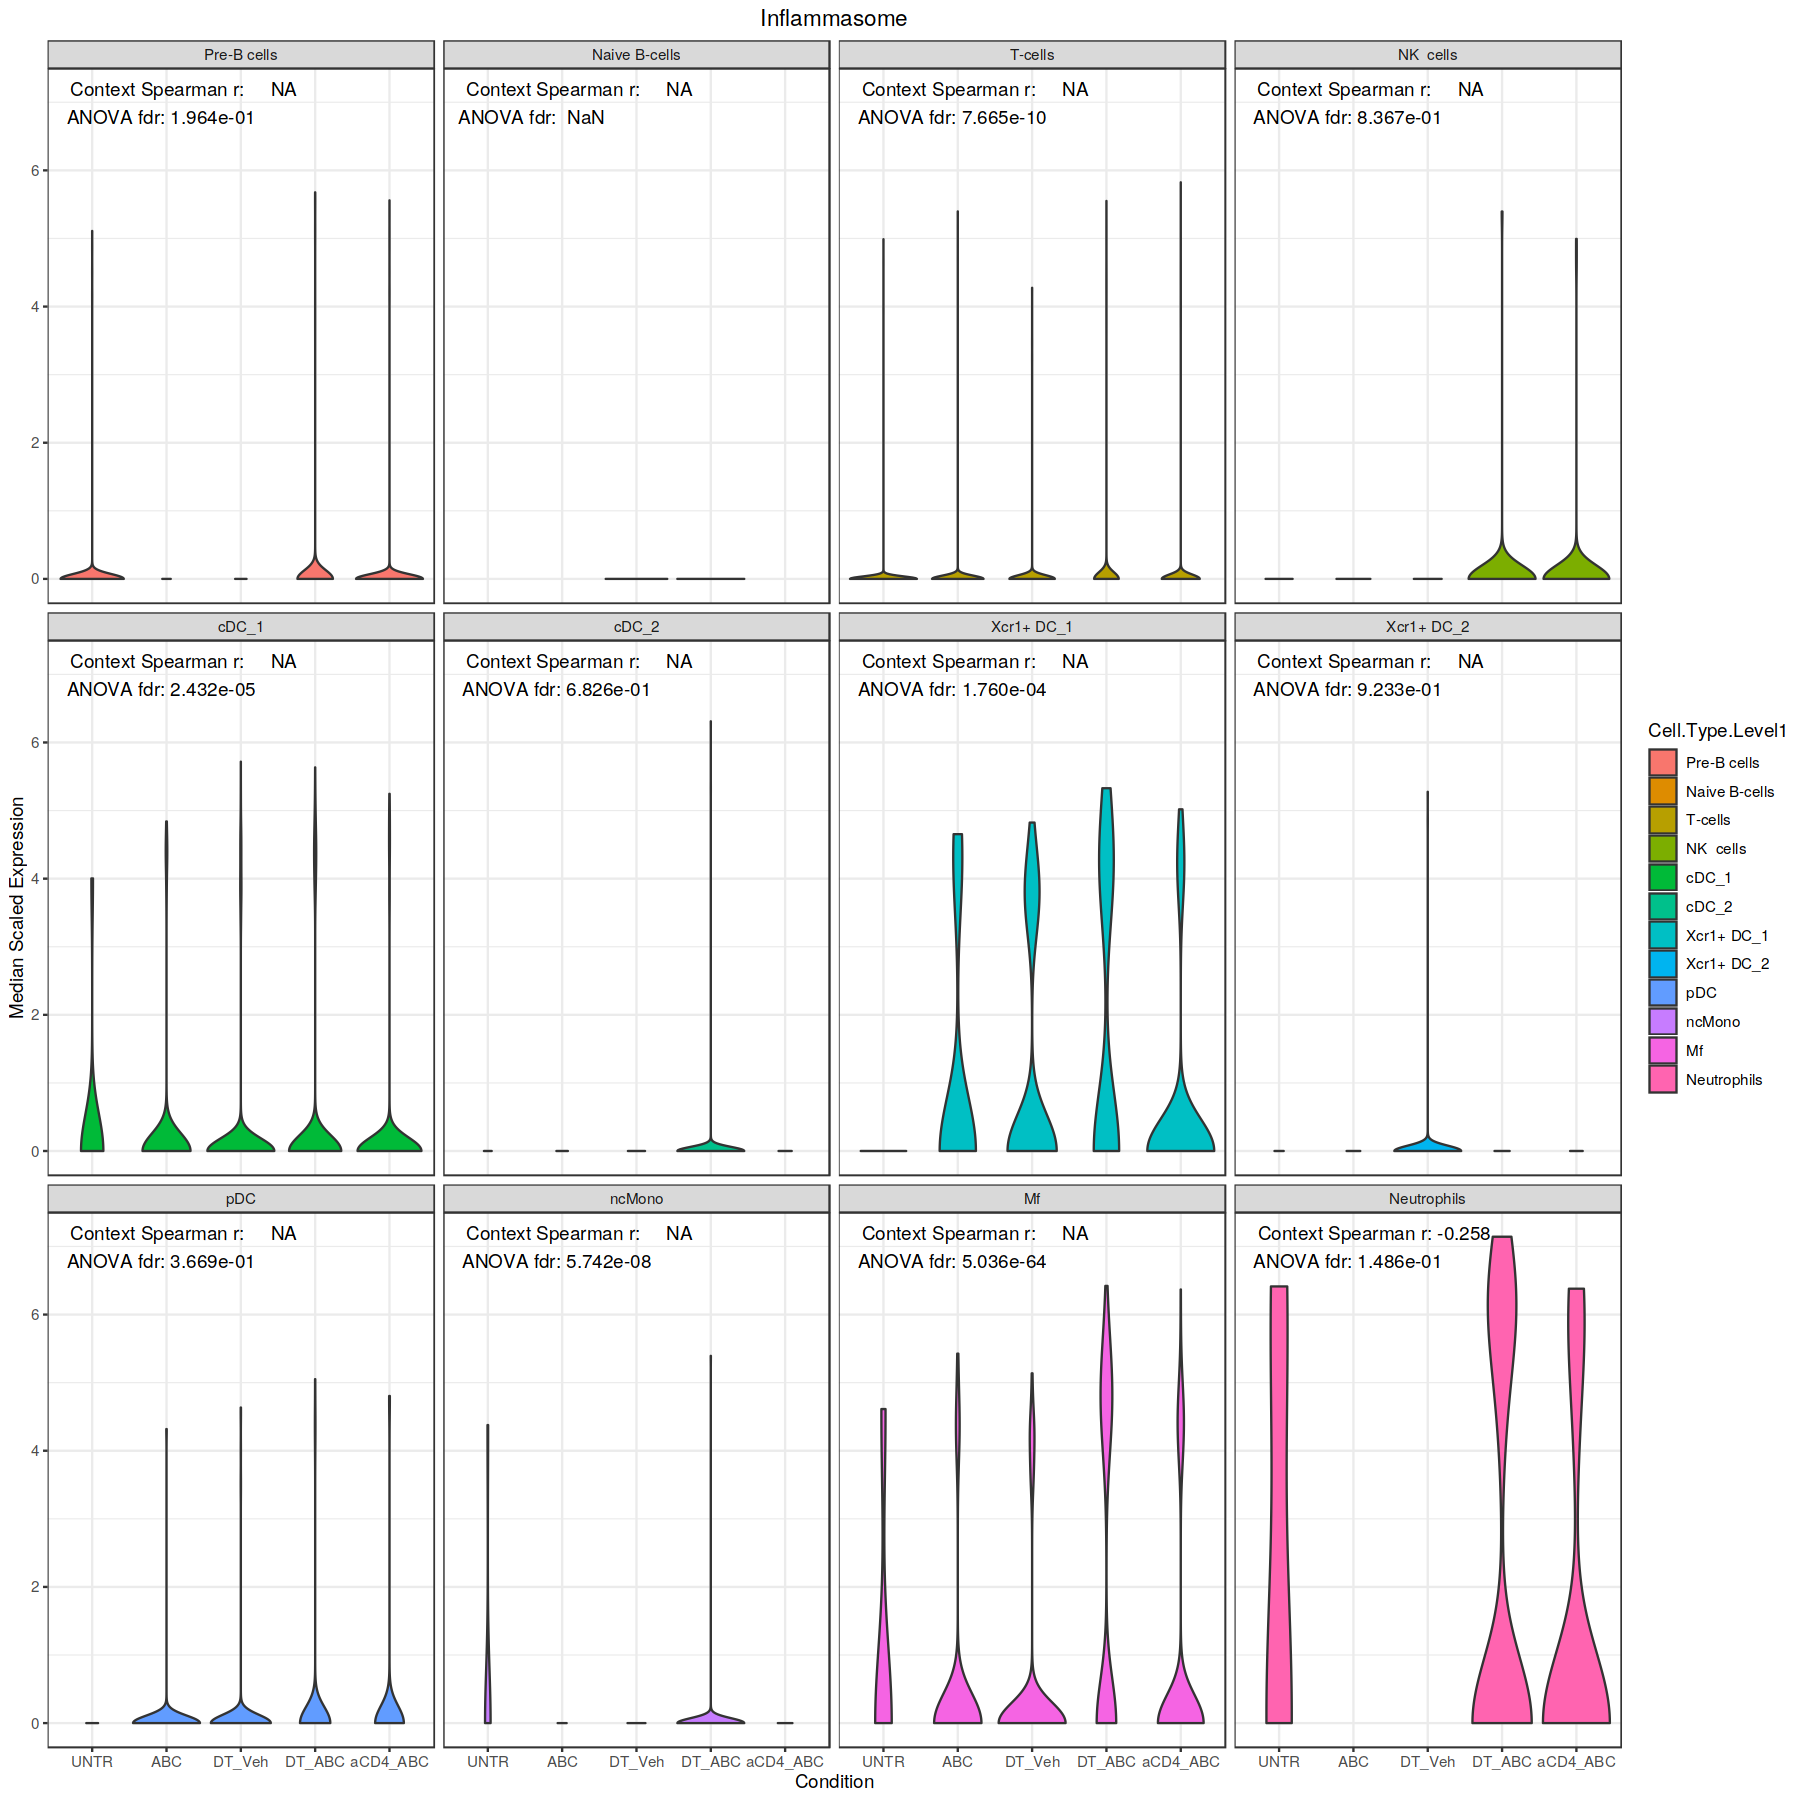

In [60]:
h_ = 15
w_ = 15
options(repr.plot.height=h_, repr.plot.width=w_)

g<-ggplot(data = md, aes(x = orig.ident, y = Med.inflammasome, fill = Cell.Type.Level1)) + 
geom_violin() + theme_bw() + 
facet_wrap( ~ Cell.Type.Level1) + ggtitle('Inflammasome') + 
theme(plot.title = element_text(hjust = 0.5)) + 
ylab('Median Scaled Expression') + xlab('Condition') + 
geom_text(data=cors.genes[['inflammasome']], 
          aes(label=paste("Context Spearman r: ", format(round(Correlation, 3), nsmall = 3), sep=""),
             x = -Inf, y = Inf, hjust = -0.1, vjust = 2))+
geom_text(data=anova.genes[['inflammasome']], 
          aes(label=paste("ANOVA fdr: ", formatC(ANOVA.fdr, format = "e", digits = 3), sep=""),
             x = -Inf, y = Inf, hjust = -0.1, vjust = 4))

g

Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”


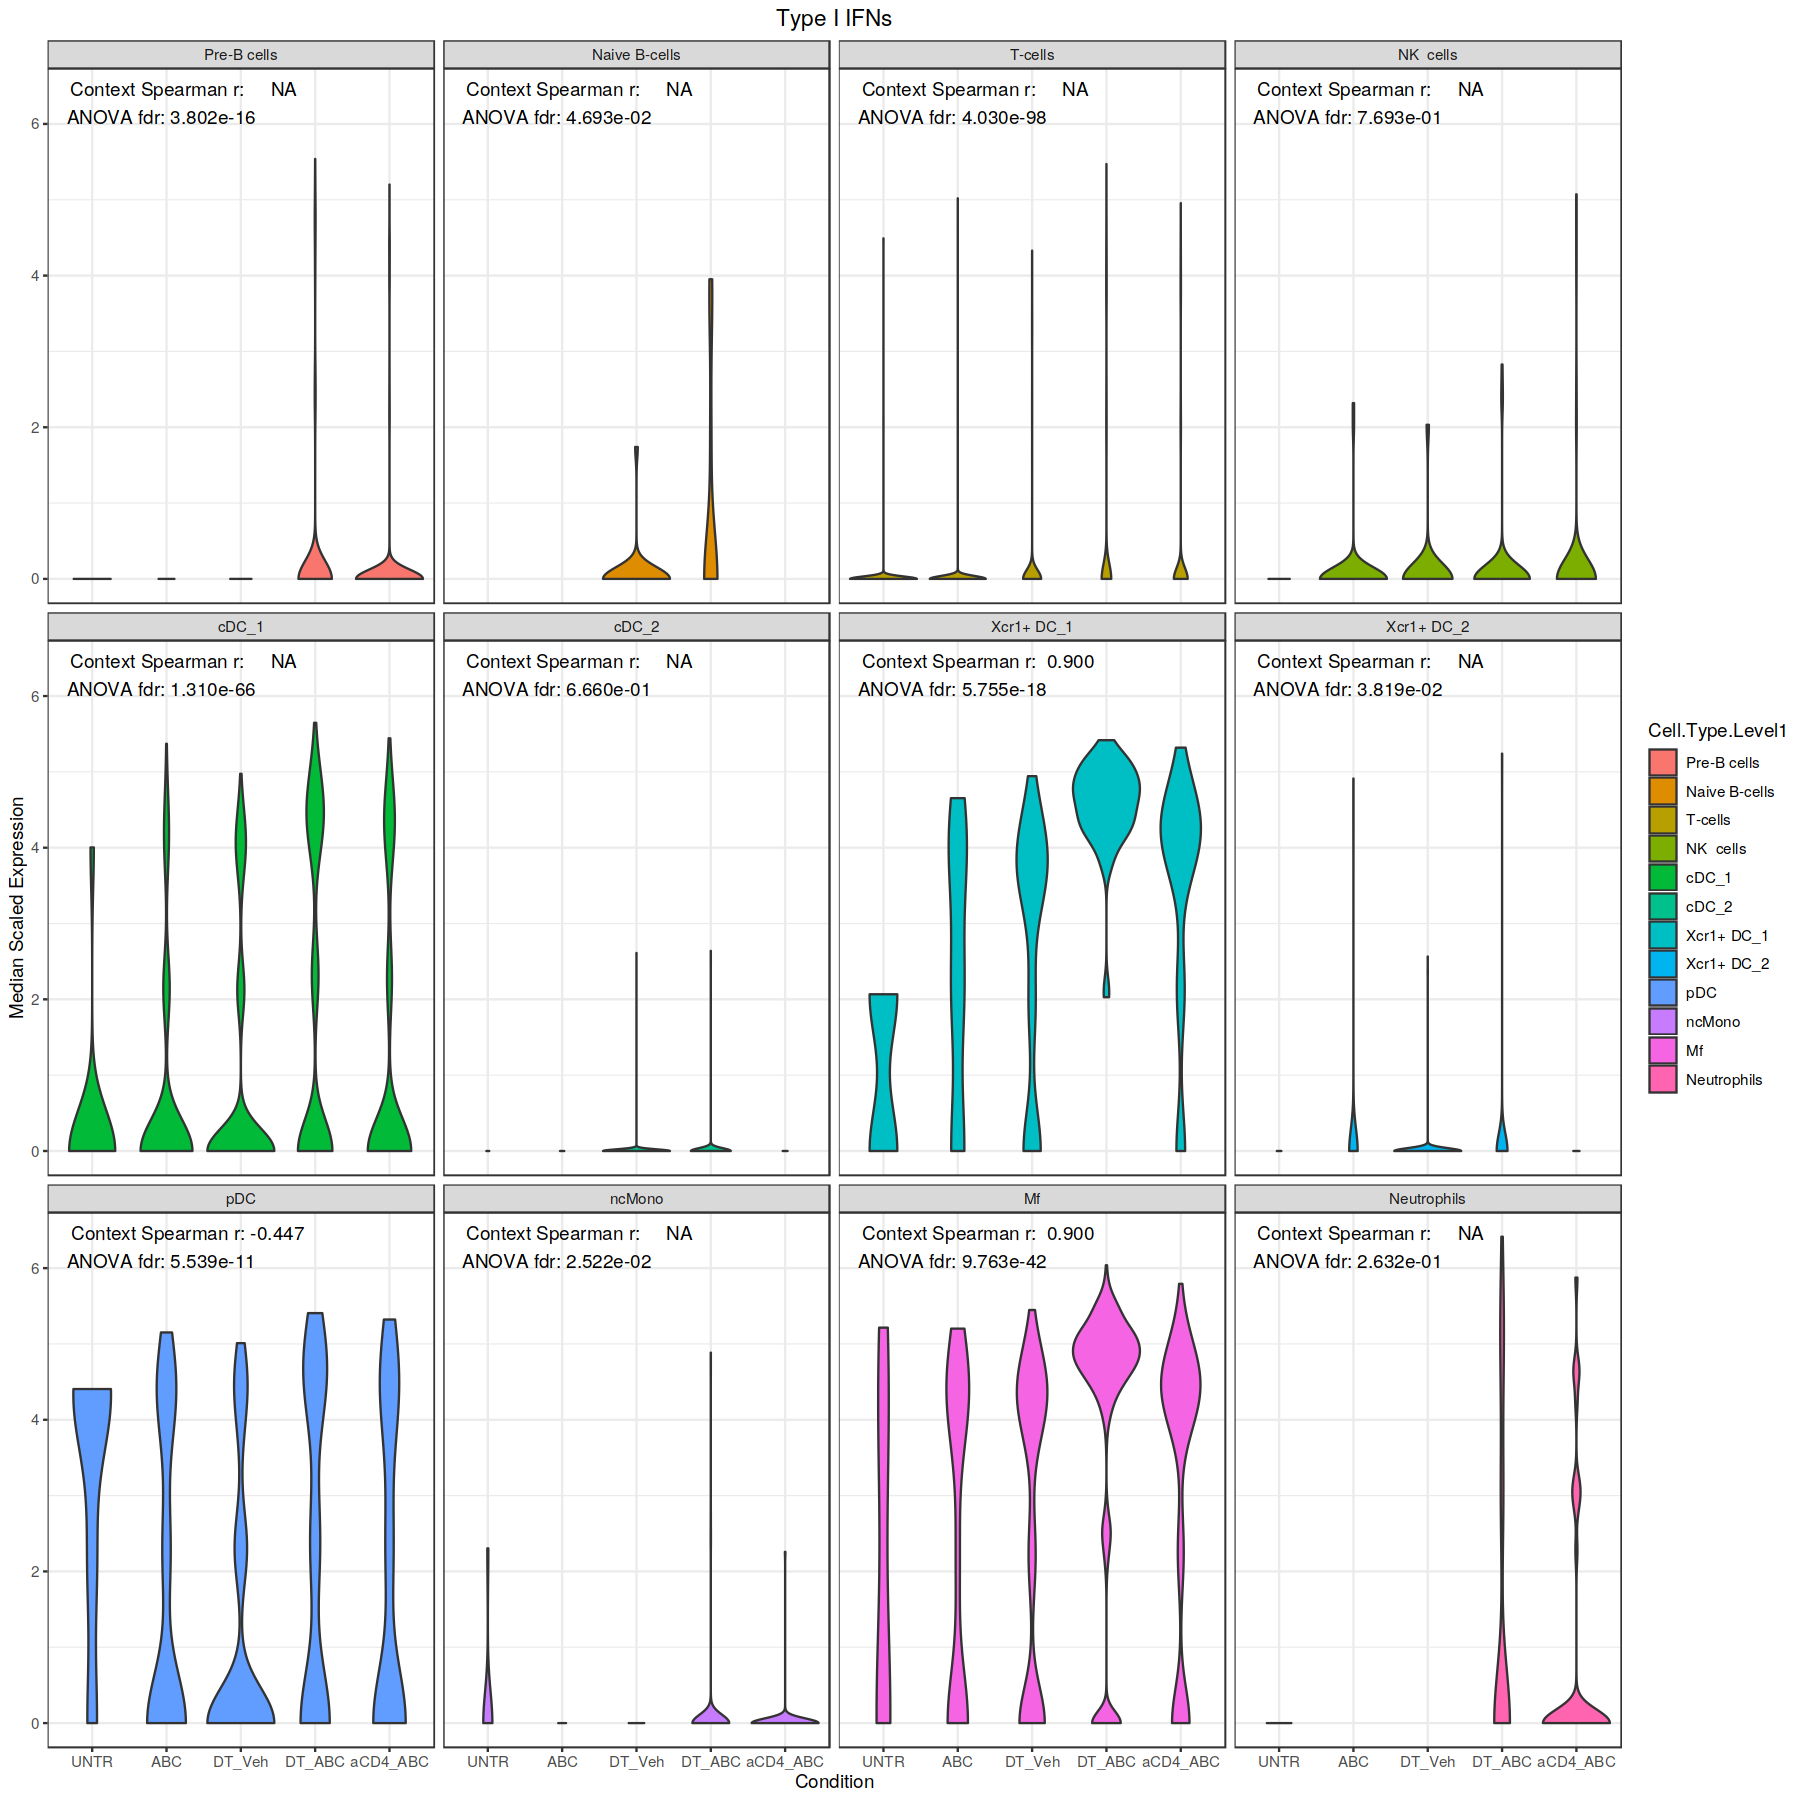

In [61]:
h_ = 15
w_ = 15
options(repr.plot.height=h_, repr.plot.width=w_)

g<-ggplot(data = md, aes(x = orig.ident, y = Med.type1.ifns, fill = Cell.Type.Level1)) + 
geom_violin() + theme_bw() + 
facet_wrap( ~ Cell.Type.Level1) + ggtitle('Type I IFNs') + 
theme(plot.title = element_text(hjust = 0.5)) + 
ylab('Median Scaled Expression') + xlab('Condition') + 
geom_text(data=cors.genes[['type1.ifns']], 
          aes(label=paste("Context Spearman r: ", format(round(Correlation, 3), nsmall = 3), sep=""),
             x = -Inf, y = Inf, hjust = -0.1, vjust = 2))+
geom_text(data=anova.genes[['type1.ifns']], 
          aes(label=paste("ANOVA fdr: ", formatC(ANOVA.fdr, format = "e", digits = 3), sep=""),
             x = -Inf, y = Inf, hjust = -0.1, vjust = 4))

g

Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”


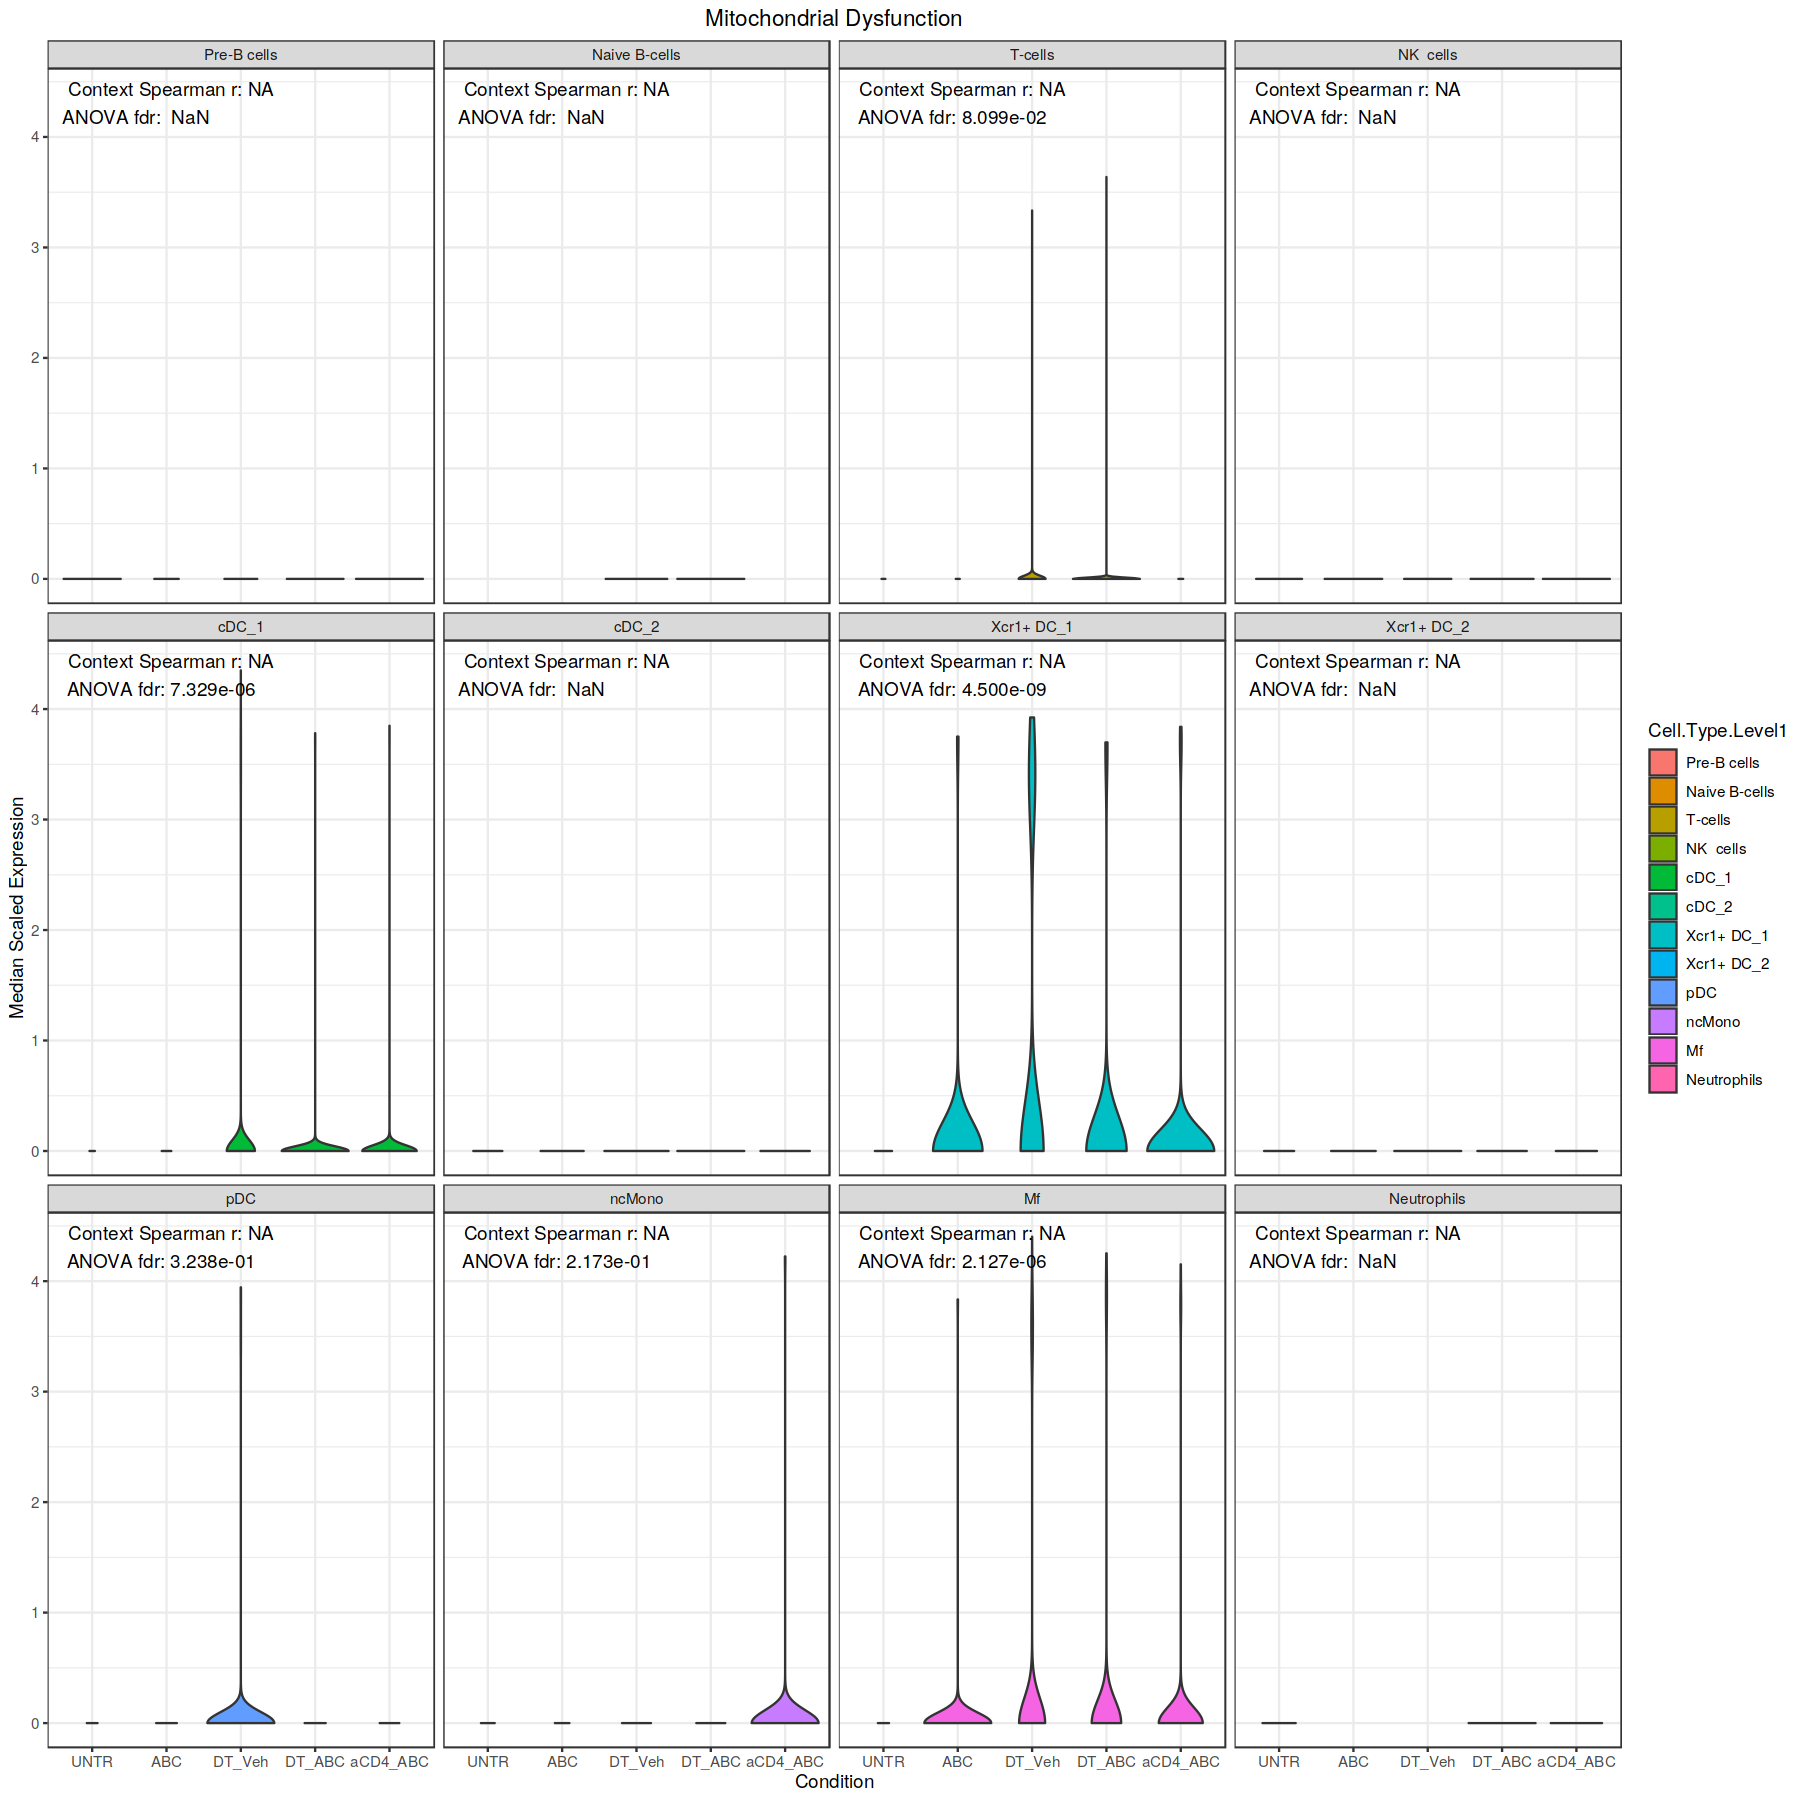

In [62]:
h_ = 15
w_ = 15
options(repr.plot.height=h_, repr.plot.width=w_)

g<-ggplot(data = md, aes(x = orig.ident, y = Med.mitochondrial.dysfunction, fill = Cell.Type.Level1)) + 
geom_violin() + theme_bw() + 
facet_wrap( ~ Cell.Type.Level1) + ggtitle('Mitochondrial Dysfunction') + 
theme(plot.title = element_text(hjust = 0.5)) + 
ylab('Median Scaled Expression') + xlab('Condition') + 
geom_text(data=cors.genes[['mitochondrial.dysfunction']], 
          aes(label=paste("Context Spearman r: ", format(round(Correlation, 3), nsmall = 3), sep=""),
             x = -Inf, y = Inf, hjust = -0.1, vjust = 2))+
geom_text(data=anova.genes[['mitochondrial.dysfunction']], 
          aes(label=paste("ANOVA fdr: ", formatC(ANOVA.fdr, format = "e", digits = 3), sep=""),
             x = -Inf, y = Inf, hjust = -0.1, vjust = 4))

g

Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”


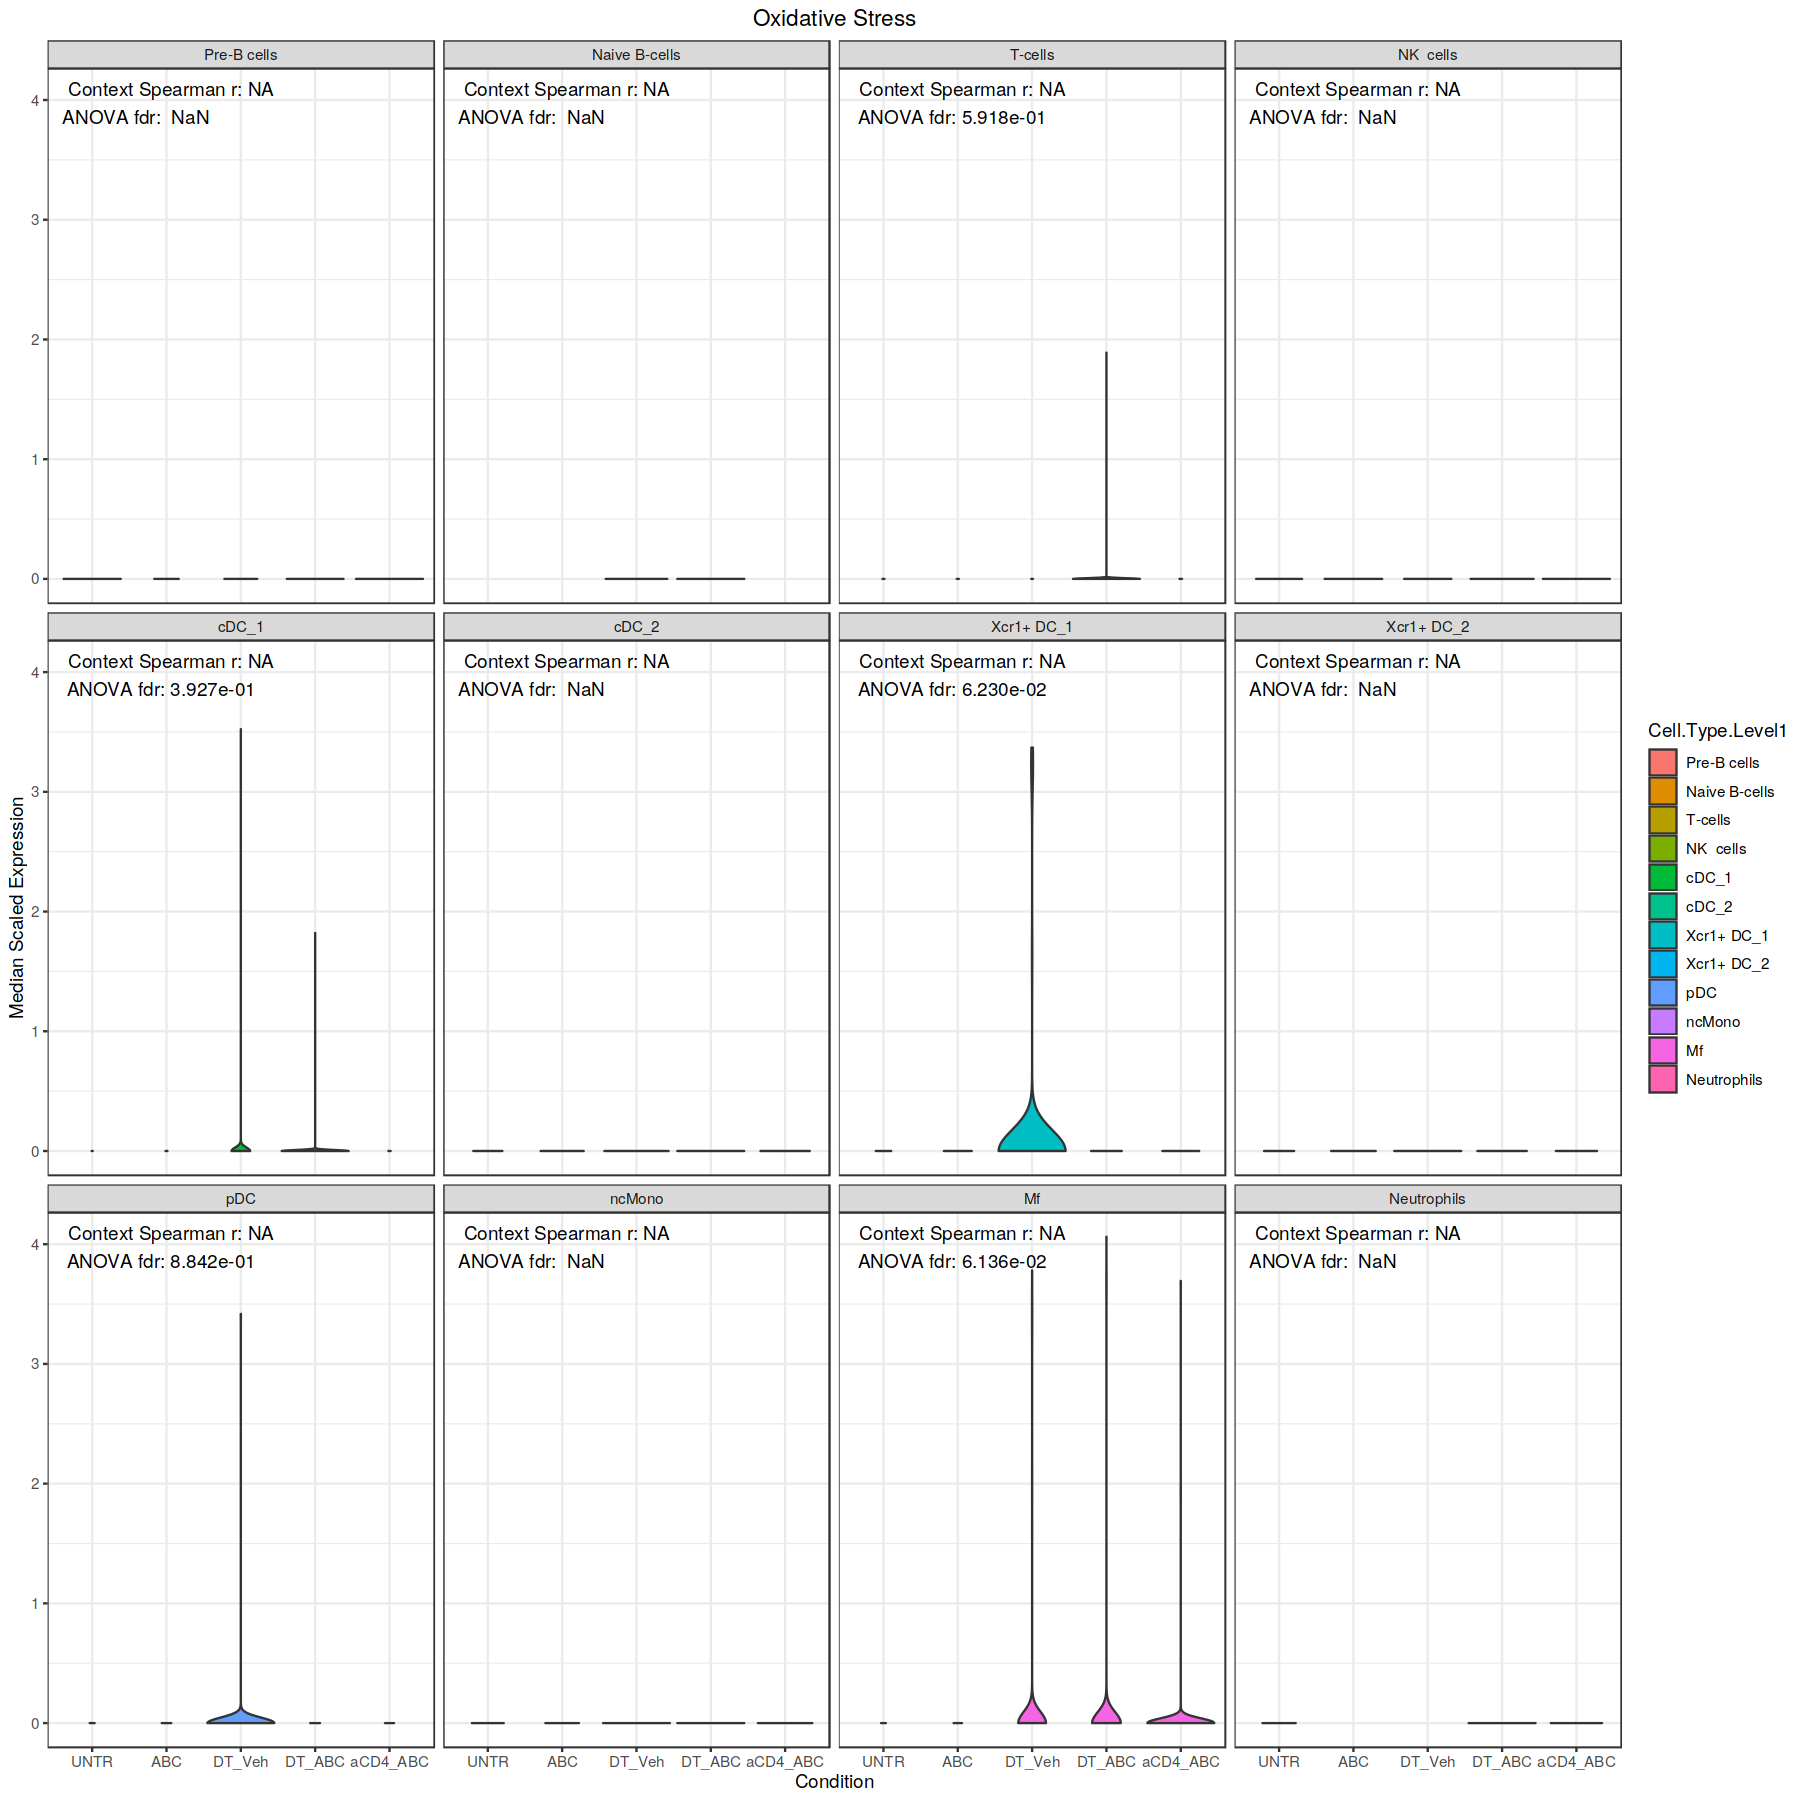

In [63]:
h_ = 15
w_ = 15
options(repr.plot.height=h_, repr.plot.width=w_)

g<-ggplot(data = md, aes(x = orig.ident, y = Med.oxidative.stress, fill = Cell.Type.Level1)) + 
geom_violin() + theme_bw() + 
facet_wrap( ~ Cell.Type.Level1) + ggtitle('Oxidative Stress') + 
theme(plot.title = element_text(hjust = 0.5)) + 
ylab('Median Scaled Expression') + xlab('Condition') + 
geom_text(data=cors.genes[['oxidative.stress']], 
          aes(label=paste("Context Spearman r: ", format(round(Correlation, 3), nsmall = 3), sep=""),
             x = -Inf, y = Inf, hjust = -0.1, vjust = 2))+
geom_text(data=anova.genes[['oxidative.stress']], 
          aes(label=paste("ANOVA fdr: ", formatC(ANOVA.fdr, format = "e", digits = 3), sep=""),
             x = -Inf, y = Inf, hjust = -0.1, vjust = 4))

g

Scatter plots look at cell type frequency in a condition (x-axis) vs median expression of a pathway (again aggregated by median in that cell type). This does not consider any order of conditions, so spearman correlation is taken instead. However, scatter plot dots are colored by the condition.

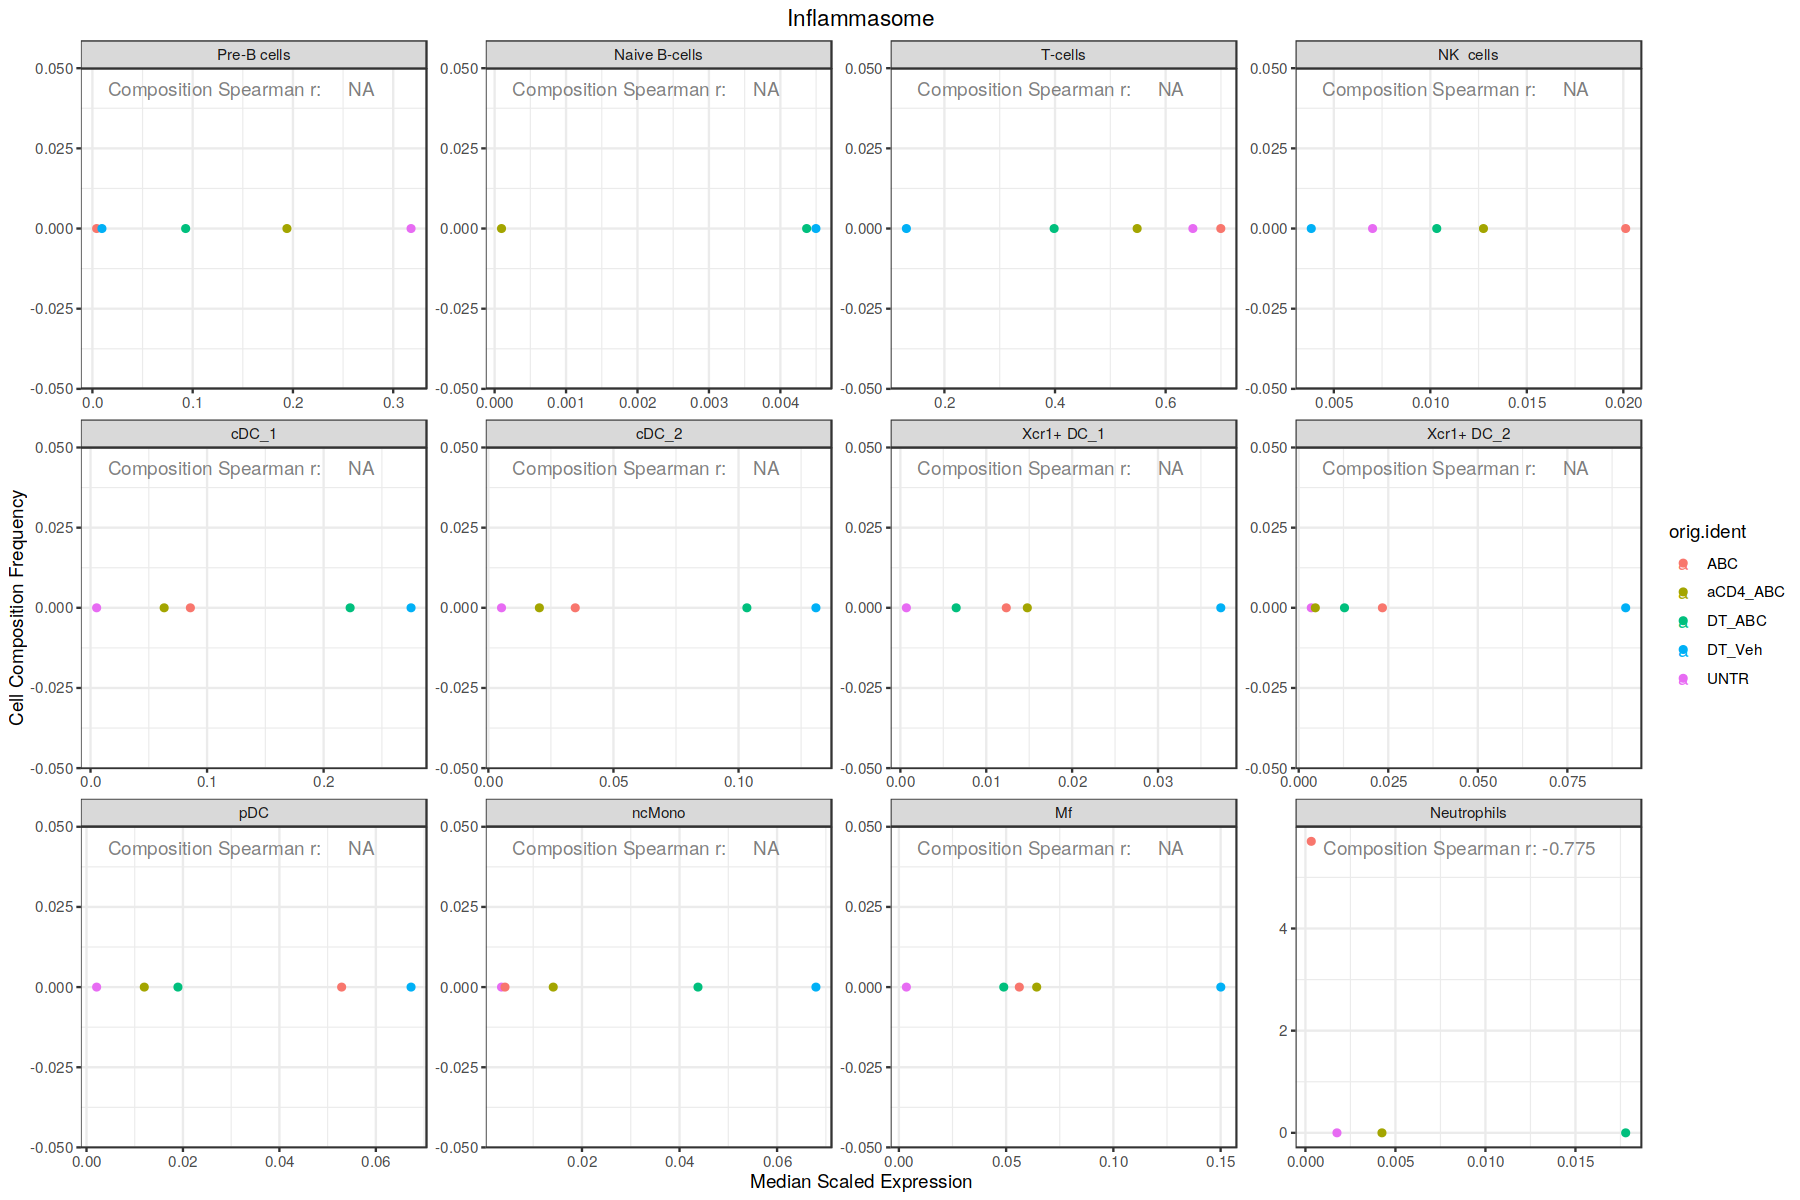

In [64]:
h_ = 10
w_ = 15
options(repr.plot.height=h_, repr.plot.width=w_)

g<-ggplot(data = cors.freq, aes(x = Frequency, y = Med.inflammasome, color = orig.ident)) + 
geom_point() + theme_bw() + 
facet_wrap( ~ Cell.Type.Level1, scales = 'free') + ggtitle('Inflammasome') + 
theme(plot.title = element_text(hjust = 0.5)) + 
ylab('Cell Composition Frequency') + xlab('Median Scaled Expression') +
geom_text(data=cors.freq.genes[['inflammasome']],
         aes(label = paste("Composition Spearman r: ", format(round(Correlation, 3), nsmall = 3), sep=""), 
         x = -Inf, y = Inf, hjust = -0.1, vjust = 2))

g

In [65]:
names(cors.freq)

[1] "Cell.Type.Level1"              "orig.ident"                   
[3] "Frequency"                     "Med.inflammasome"             
[5] "Med.type1.ifns"                "Med.mitochondrial.dysfunction"
[7] "Med.oxidative.stress"          "Condition"

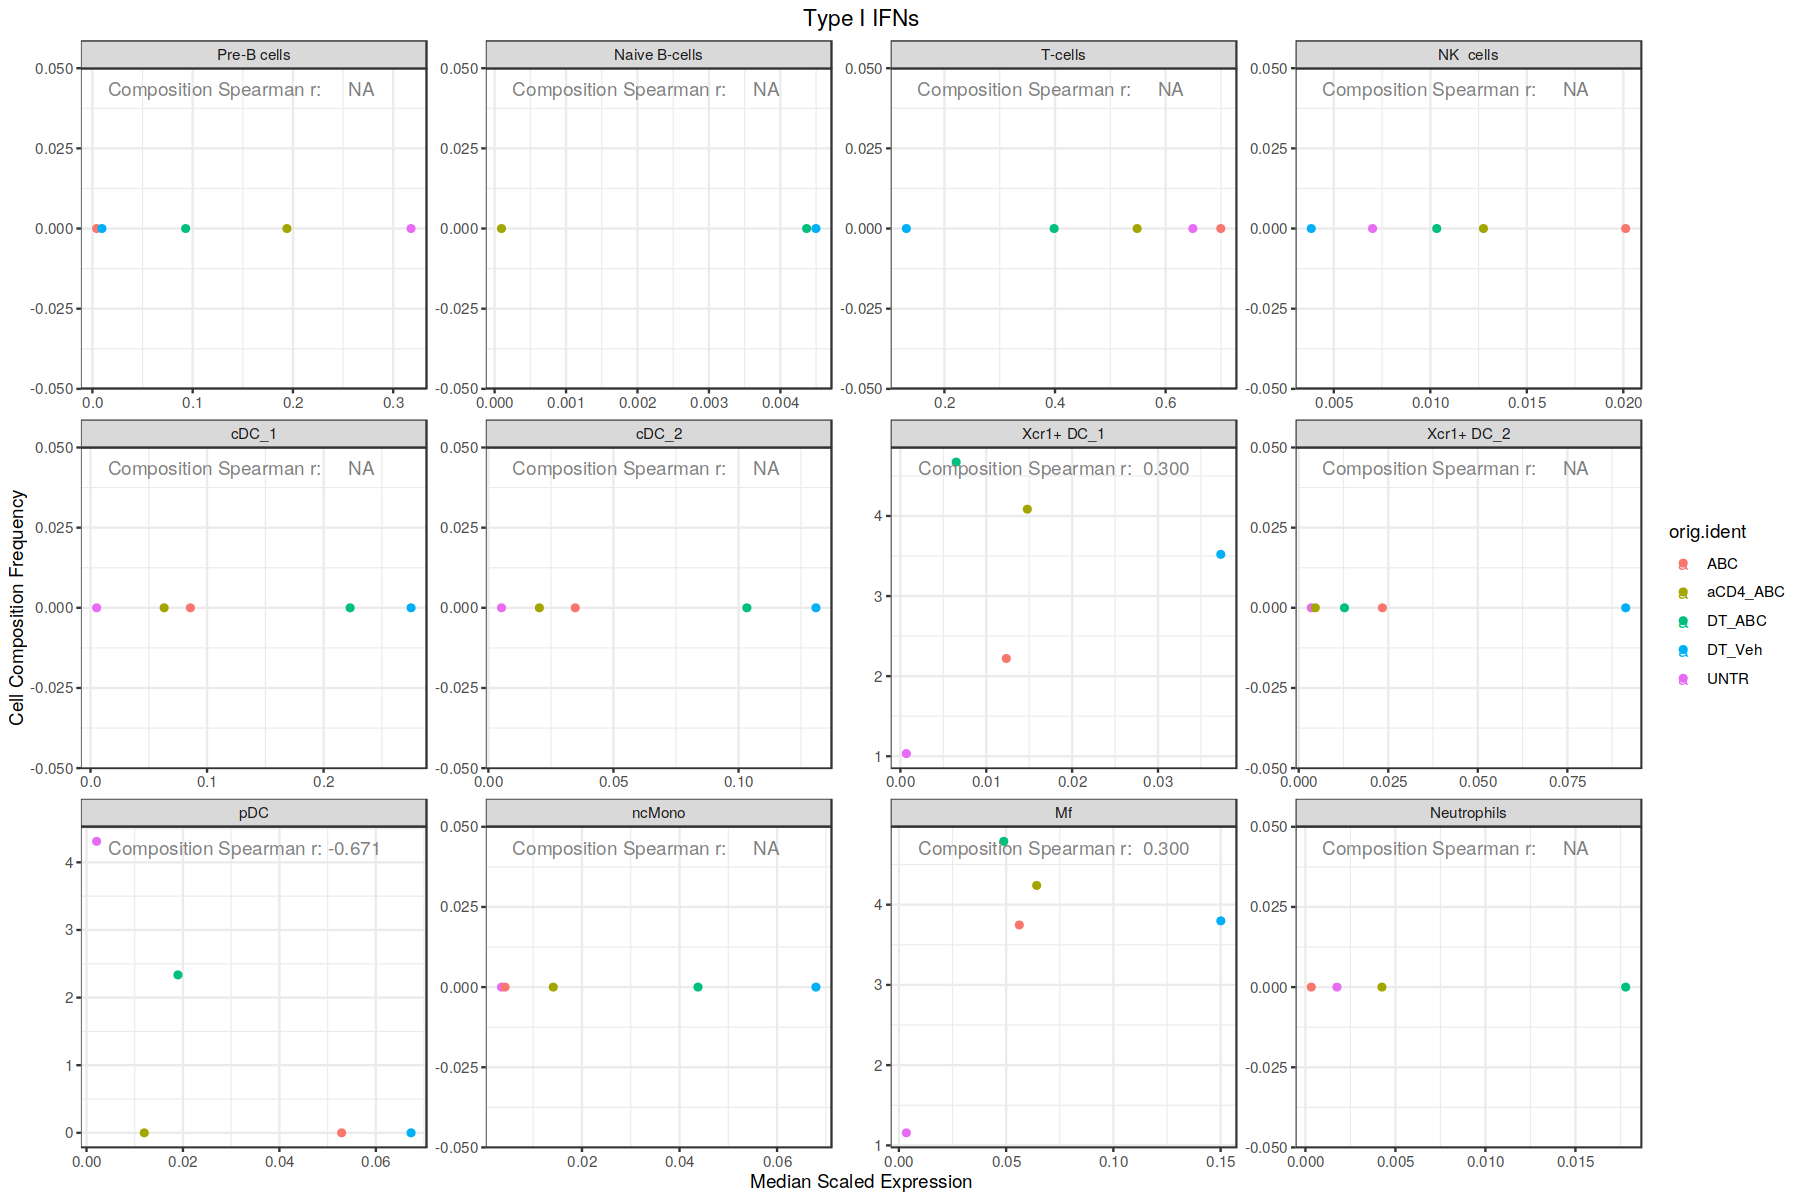

In [66]:
h_ = 10
w_ = 15
options(repr.plot.height=h_, repr.plot.width=w_)

g<-ggplot(data = cors.freq, aes(x = Frequency, y = Med.type1.ifns, color = orig.ident)) + 
geom_point() + theme_bw() + 
facet_wrap( ~ Cell.Type.Level1, scales = 'free') + ggtitle('Type I IFNs') + 
theme(plot.title = element_text(hjust = 0.5)) + 
ylab('Cell Composition Frequency') + xlab('Median Scaled Expression') +
geom_text(data=cors.freq.genes[['type1.ifns']],
         aes(label = paste("Composition Spearman r: ", format(round(Correlation, 3), nsmall = 3), sep=""), 
         x = -Inf, y = Inf, hjust = -0.1, vjust = 2))

g

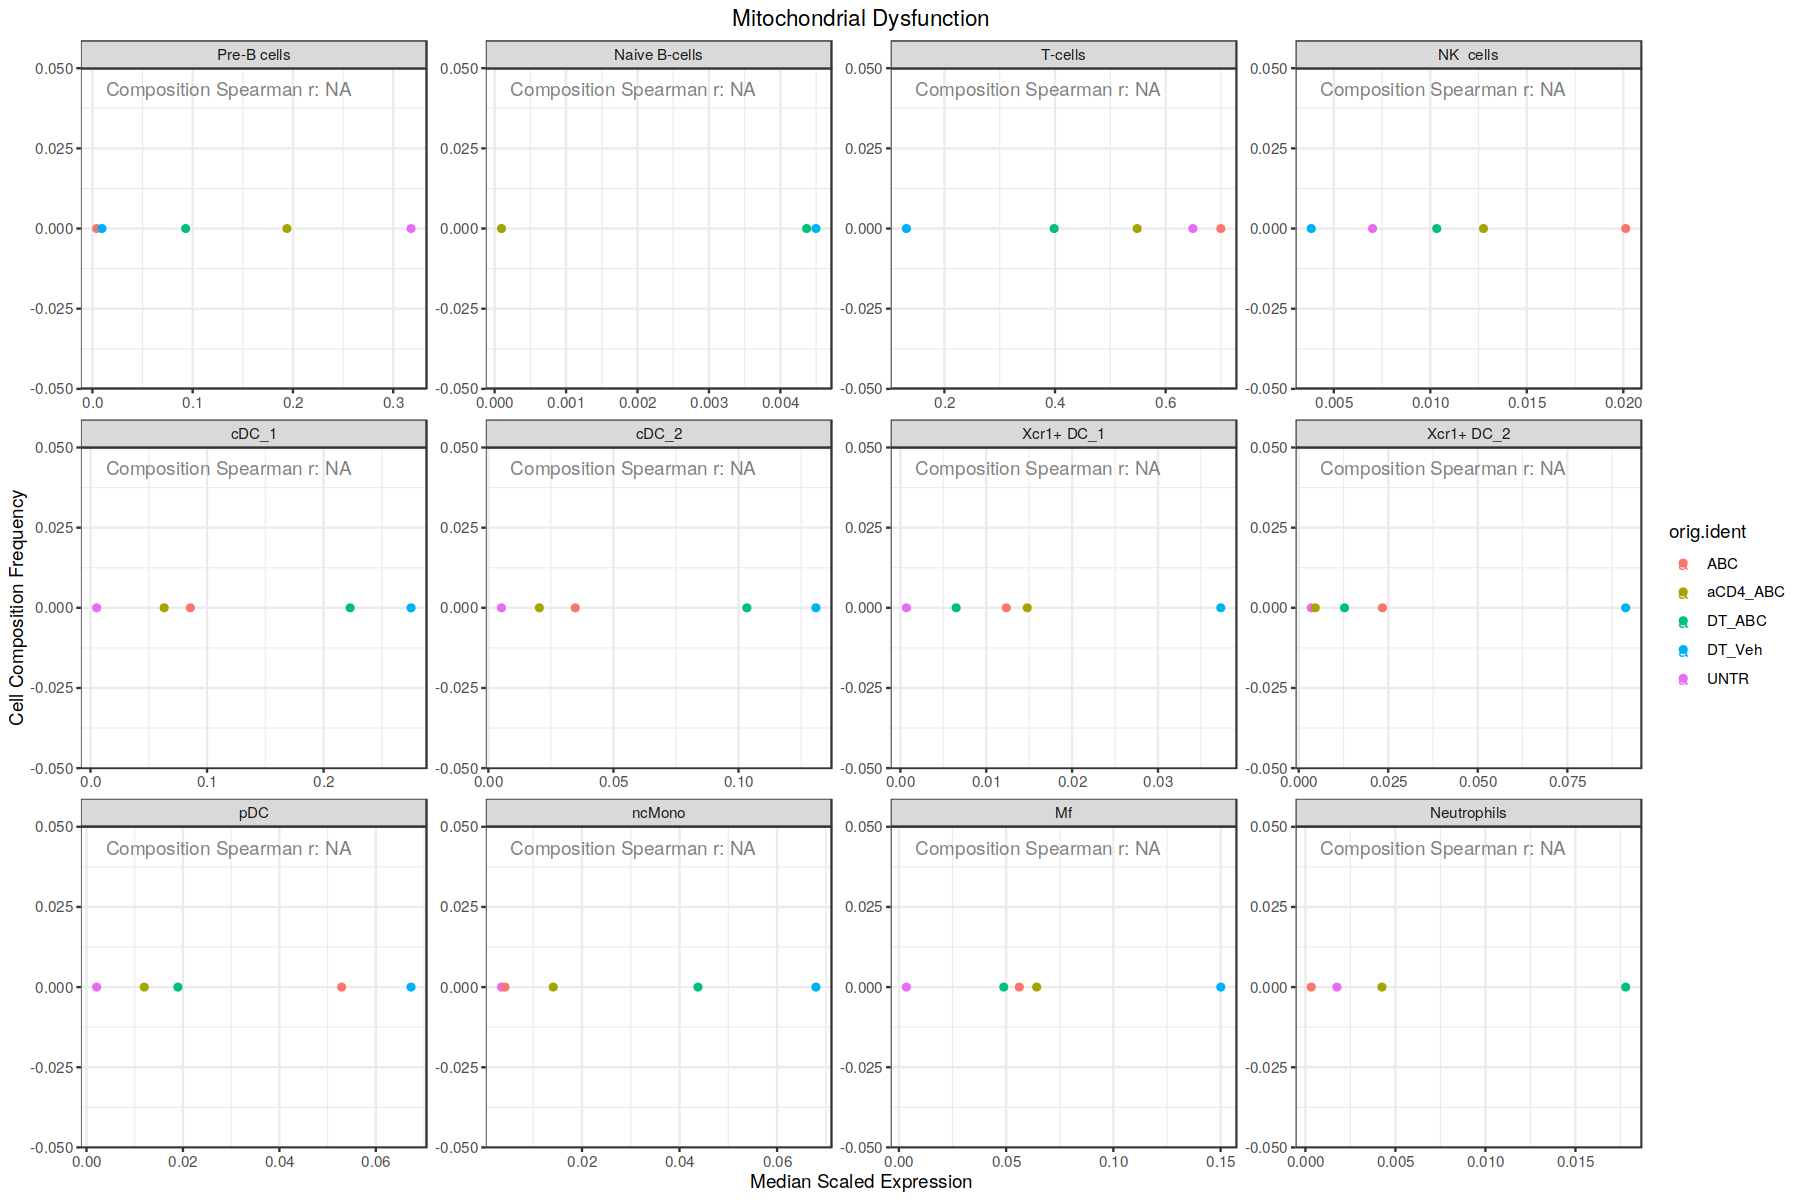

In [67]:
h_ = 10
w_ = 15
options(repr.plot.height=h_, repr.plot.width=w_)

g<-ggplot(data = cors.freq, aes(x = Frequency, y = Med.mitochondrial.dysfunction, color = orig.ident)) + 
geom_point() + theme_bw() + 
facet_wrap( ~ Cell.Type.Level1, scales = 'free') + ggtitle('Mitochondrial Dysfunction') + 
theme(plot.title = element_text(hjust = 0.5)) + 
ylab('Cell Composition Frequency') + xlab('Median Scaled Expression') +
geom_text(data=cors.freq.genes[['mitochondrial.dysfunction']],
         aes(label = paste("Composition Spearman r: ", format(round(Correlation, 3), nsmall = 3), sep=""), 
         x = -Inf, y = Inf, hjust = -0.1, vjust = 2))

g

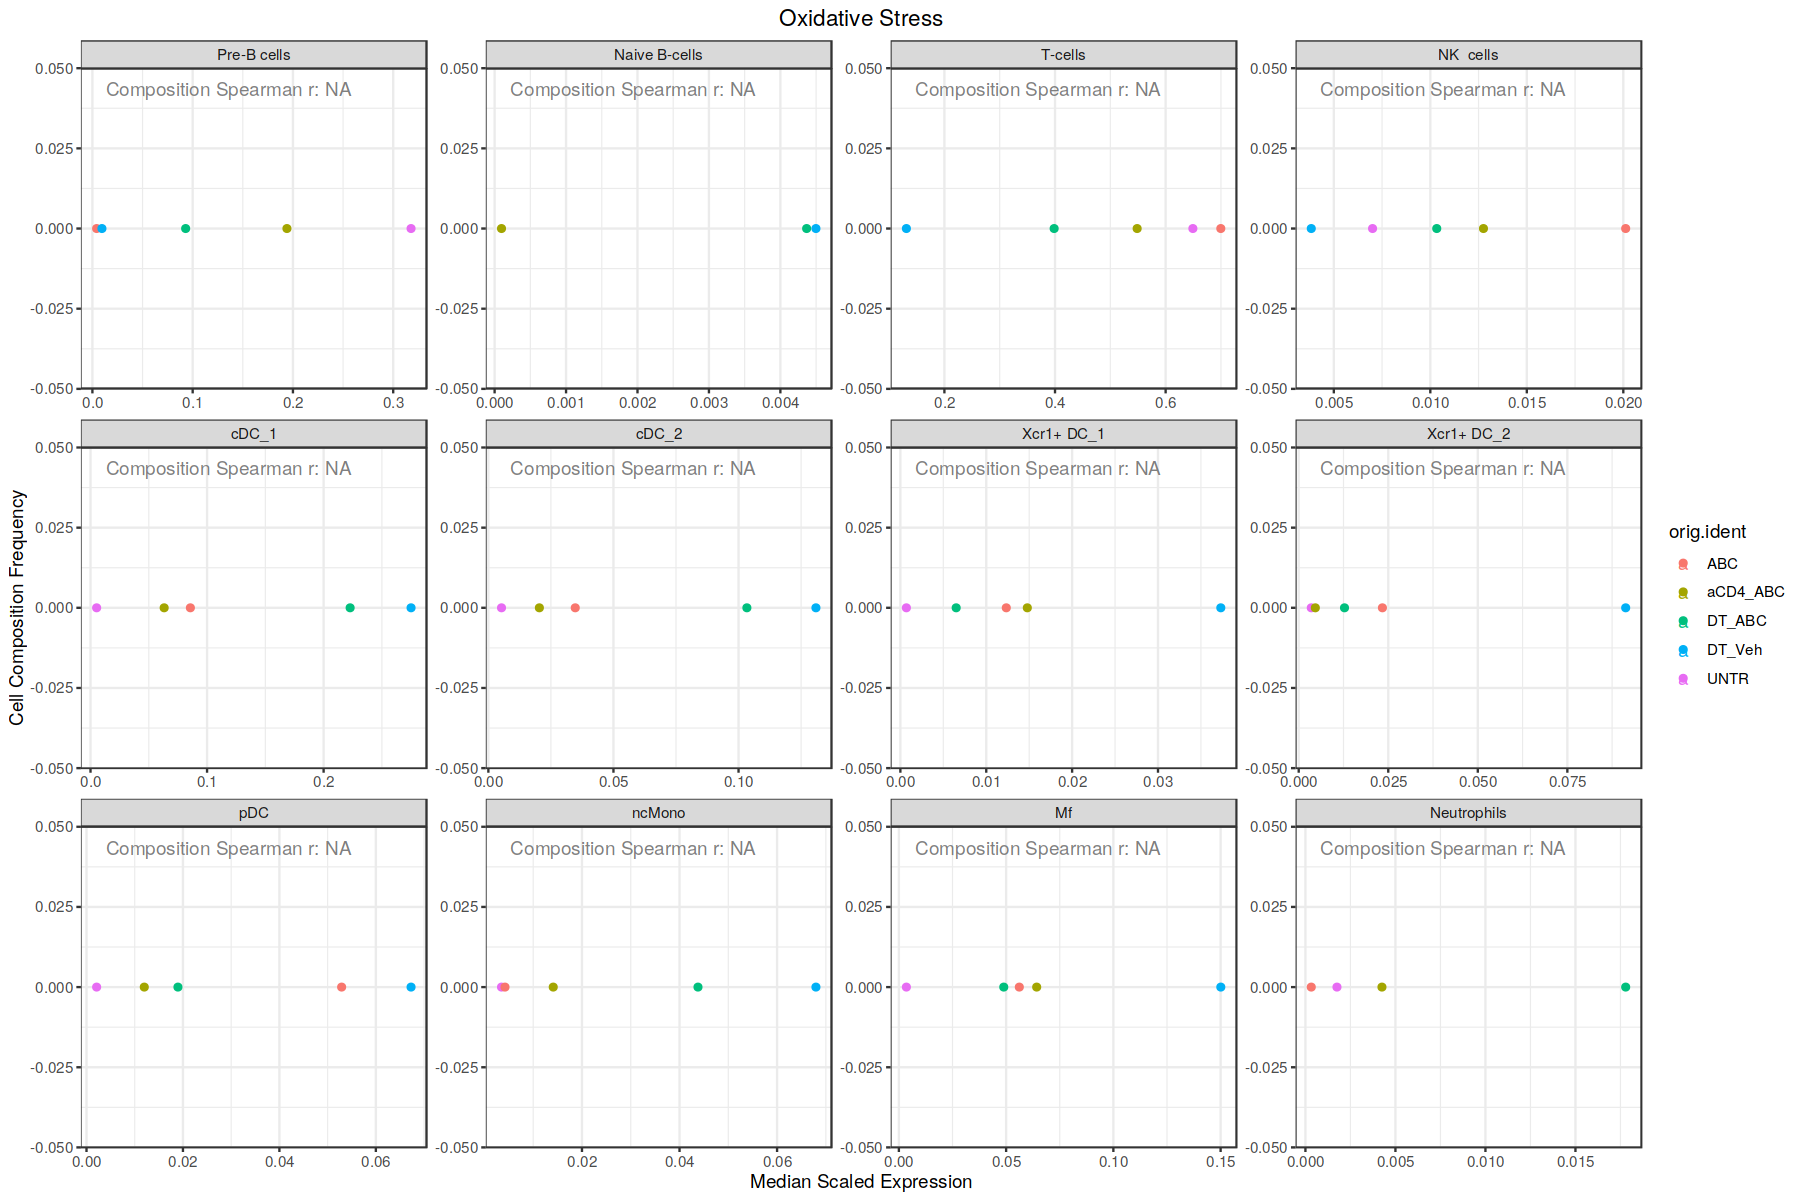

In [68]:
h_ = 10
w_ = 15
options(repr.plot.height=h_, repr.plot.width=w_)

g<-ggplot(data = cors.freq, aes(x = Frequency, y = Med.oxidative.stress, color = orig.ident)) + 
geom_point() + theme_bw() + 
facet_wrap( ~ Cell.Type.Level1, scales = 'free') + ggtitle('Oxidative Stress') + 
theme(plot.title = element_text(hjust = 0.5)) + 
ylab('Cell Composition Frequency') + xlab('Median Scaled Expression') +
geom_text(data=cors.freq.genes[['oxidative.stress']],
         aes(label = paste("Composition Spearman r: ", format(round(Correlation, 3), nsmall = 3), sep=""), 
         x = -Inf, y = Inf, hjust = -0.1, vjust = 2))

g